# Provided dataset description


These 52 features include:
Minimum, maximum, mean, median, standard deviation, variance, kurtosis, and skewness of the raw voltage.
Minimum, maximum, mean, median, standard deviation, variance, kurtosis, and skewness of the Delta, Theta, Alpha, Beta, and Gamma brainwave bandpass filter outputs.
The two dominant frequencies.
The average power of the alpha, beta, theta, delta, and gamma brainwave bands.


https://ieeexplore.ieee.org/document/8710576

J. J. Bird, L. J. Manso, E. P. Ribeiro, A. Ekárt and D. R. Faria, "A Study on Mental State Classification using EEG-based Brain-Machine Interface," 2018 International Conference on Intelligent Systems (IS), Funchal, Portugal, 2018, pp. 795-800, doi: 10.1109/IS.2018.8710576.
keywords: {Iron;IP networks;EEG;brain-machine interface;machine learning;mental states classification},


The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. We used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. Six minutes of resting neutral data is also recorded.
Our method of statistical extraction resampled the data since waves must be mathematically described in a temporal fashion.

https://www.kaggle.com/code/shreyaspj/detecting-emotions-using-eeg-waves/input





A commercial MUSE EEG headband is used with a resolution of four (TP9, AF7, AF8, TP10) electrodes. Positive and negative emotional states are invoked using film clips with an obvious valence, and neutral resting data is also recorded with no stimuli involved, all for one minute per session. Statistical extraction of the alpha, beta, theta, delta and gamma brainwaves is performed to generate a large dataset that is then reduced to smaller datasets by feature selection using scores from OneR, Bayes Network, Information Gain, and Symmetrical Uncertainty. Of the set of 2548 features, a subset of 63 selected by their Information Gain values were found to be best when used with ensemble classifiers such as Random Forest.

Raw electrical data is measured in Microvolts (uV) 
at observed time t producing wave patterns from t to t+n


Microvoltage 
measurements are recorded from the TP9, AF7, AF8, and TP10 
electrodes, as seen in figure 3. Sixty seconds of data were 
recorded from two subjects (1 male, 1 female, aged 20-22) for 
each of the 6 film clips found in Table II producing 12 minutes 
(720 seconds) of brain activity data (6 minutes for each emotional 
state). Six minutes of neutral brainwave data were also collected 
resulting in a grand total of 36 minutes of EEG data recorded from 
subjects. With a variable frequency resampled to 150Hz, this 
resulted in a dataset of 324,000 data points collected from the 
waves produced by the brain. Activities were exclusively stimuli 
that would evoke emotional responses from the set of emotions 
found in Table I and were considered by their valence labels of 
positive and negative rather than the emotions themselves. Neutral 
data were also collected, without stimuli and before any of the 
emotions data (to avoid contamination by the latter), for a third 
class that would be the resting emotional state of the subject. 
Three minutes of data were collected per day to reduce the 
interference of a resting emotional state.


https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface



ex: fft_300_b

fft = Fast Fourier Transform

300 = bin number

b = human subject "b"?

source of documentation for this?

750 bins per a and per b values

data production: raw → µV → FFT → bins → your column names.



# Time

Microvoltage 
measurements are recorded from the TP9, AF7, AF8, and TP10 
electrodes, as seen in figure 3. 

Sixty seconds of data were 

recorded from two subjects (1 male, 1 female, aged 20-22)

for each of the 6 film clips found in Table II producing 12 minutes (720 seconds) of brain activity data

(6 minutes for each emotional state).

Six minutes of neutral brainwave data were also collected 


resulting in a grand total of 36 minutes of EEG data recorded from 
subjects. With a variable frequency resampled to 150Hz, this 
resulted in a dataset of 324,000 data points


sampling rate (samples per second), creating a time_elapsed column (count * sample_interval_in_seconds) can be useful.

The MUSE EEG headband typically uses a sampling rate of 256 Hz. 
This means it captures 256 data points per second from the brainwave activity. 

value like _0_ (as seen in mean_0_a, stddev_0_a, max_0_a, min_0_a) commonly refers to features extracted from the raw EEG voltage signal itself (before band-pass filtering into specific frequency bands). The article lists 8 statistical features extracted from the "raw voltage."



BRAINWAVE BANDS

1 - Delta (0.5-4 Hz): Associated with deep, dreamless sleep, unconsciousness, and physical restoration.

2- Theta (4-8 Hz): Linked to deep relaxation, meditation, creativity, introspection, and light sleep (especially REM).

3 - Alpha (8-12 Hz): Characteristic of relaxed wakefulness, a calm and reflective state, and mental peace.

4 - Beta (13-30 Hz): Dominant during active thinking, alertness, concentration, problem-solving, and engaged mental activity.

5 - Gamma (30-100+ Hz): Involved in high-level information processing, intense focus, learning, memory formation, and heightened perception.


# Fft power or amplitude?
<br>If the values are power (e.g., from a power spectral density calculation already), you can sum them directly.

Recommendation: It's standard practice to work with power for band analysis. If your values are amplitudes, square them first.




EEG voltages are usually in the range of microvolts (µV), typically around 10–100 µV. Even if scaled to millivolts, you’d expect values like 0.01–0.1 mV, rarely going above 1 mV.

power spectral density (PSD), or raw power in each frequency bin.

# fft units = PSD

# Import Libraries

In [1]:
import shap
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy.signal import savgol_filter # denoising
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, recall_score, precision_score

In [2]:
# LSTM Imports
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Setting seed for reproducibility
# np.random.seed(1234)  
PYTHONHASHSEED = 0

from sklearn import preprocessing

from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import pad_sequences

# Load and evaluate data
missing values

datatypes

value counts

description of each column type

In [3]:
raw_df = pd.read_csv('emotions.csv')
raw_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [5]:
raw_df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [6]:
# Rows, columns
raw_df.shape 

(2132, 2549)

In [7]:
# Show col datatypes in df
raw_df.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [8]:
# Total missing values in df
raw_df.isnull().sum().sum()

0

In [9]:
# Count duplicate rows
raw_df.duplicated().sum()

0

In [10]:
# Count target labels
raw_df['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [11]:
# Unique column prefix counts
prefix_counts = {}
for col in raw_df.columns:
    prefix = col.split('_')[0]
    if prefix in prefix_counts:
        prefix_counts[prefix] += 1
    else:
        prefix_counts[prefix] = 1

# Create a Pandas DataFrame from the prefix_counts dictionary
counts_df = pd.DataFrame(list(prefix_counts.items()), columns=['Unique Prefix', 'Count'])

print("Unique column prefixes and their counts:")
print(counts_df)

Unique column prefixes and their counts:
   Unique Prefix  Count
0         # mean      1
1           mean    119
2         stddev     20
3        moments     40
4            max    120
5            min    120
6         covmat    288
7          eigen     24
8           logm    156
9       entropy0      2
10      entropy1      2
11      entropy2      2
12      entropy3      2
13      entropy4      2
14     correlate    150
15           fft   1500
16         label      1


# Clean and transform data
impute or remove

group columns

make time_elapsed column

SHAP

test one group of brainwaves to model, vs a group of separate brainwaves vs model

find specific frequency with high SHAP or just group them?

In [12]:
# Select column names with prefix "fft"
fft_df = raw_df.filter(regex='fft').copy()

# Add label to dataset
fft_df['label'] = raw_df['label']

In [13]:
fft_df.head()

,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,fft_8_a,fft_9_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,-520.0,398.00,-201.0,-201.0,398.00,-52.2,121.00,-64.0,-64.0,121.00,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,66.2,-4.30,43.6,43.6,-4.30,66.0,-29.00,73.3,73.3,-29.00,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,-90.8,204.00,-77.1,-77.1,204.00,-488.0,415.00,-187.0,-187.0,415.00,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,119.0,6.25,10.9,10.9,6.25,-333.0,283.00,-144.0,-144.0,283.00,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,59.0,-2.37,10.8,10.8,-2.37,118.0,-1.81,26.7,26.7,-1.81,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


MUSE EEG headband typically uses a sampling rate of 256 Hz. 
(256 data points per second)

# Add seconds, min elapsed

In [14]:
# Add time_elapsed column in seconds based on 256 Hz sampling rate for MUSE EEG
fft_df['seconds_elapsed'] = fft_df.index / 256
# Add seconds and minute elapsed columns
fft_df['minutes_elapsed'] = fft_df['seconds_elapsed'] // 60

fft_df.head()

,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,fft_8_a,fft_9_a,...,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label,seconds_elapsed,minutes_elapsed
0,-520.0,398.00,-201.0,-201.0,398.00,-52.2,121.00,-64.0,-64.0,121.00,...,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE,0.000000,0.0
1,66.2,-4.30,43.6,43.6,-4.30,66.0,-29.00,73.3,73.3,-29.00,...,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL,0.003906,0.0
2,-90.8,204.00,-77.1,-77.1,204.00,-488.0,415.00,-187.0,-187.0,415.00,...,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE,0.007812,0.0
3,119.0,6.25,10.9,10.9,6.25,-333.0,283.00,-144.0,-144.0,283.00,...,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE,0.011719,0.0
4,59.0,-2.37,10.8,10.8,-2.37,118.0,-1.81,26.7,26.7,-1.81,...,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL,0.015625,0.0


# Encode label column

In [15]:
# Variables
X = fft_df.drop(['label', 'seconds_elapsed', 'minutes_elapsed'], axis=1) # axis 1 = across columns
y =fft_df['label']
# Encode y values to numeric**************************************
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# View the mapping of original class labels to encoded numbers
for class_label, encoded_label in zip(le.classes_, range(len(le.classes_))):
    print(f"{class_label} → {encoded_label}")

NEGATIVE → 0
NEUTRAL → 1
POSITIVE → 2


# Visualize slice of fft vs time vs label

showing 3 groups of PSD data for when the label is negative, positive and neutral

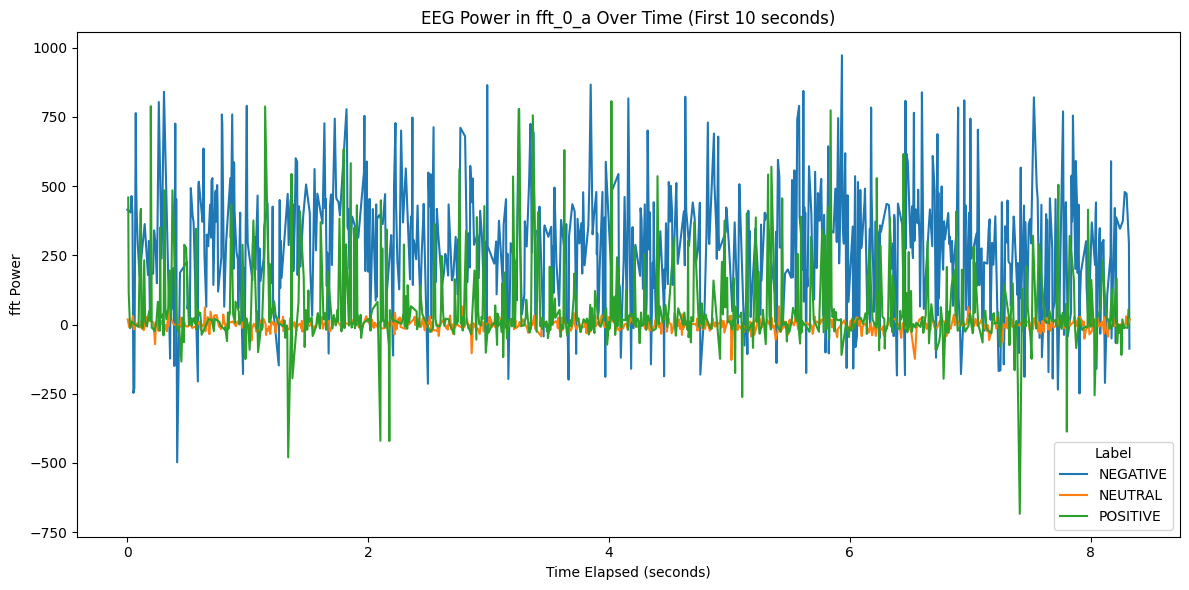

In [16]:
# Select a reasonable slice of time, e.g., first 10 seconds
slice_df = fft_df[fft_df['seconds_elapsed'] <= 10]

# Plot time vs fft, color-coded by label
plt.figure(figsize=(12, 6))
sns.lineplot(data=slice_df, x='seconds_elapsed', y='fft_31_a', hue='label')
plt.title('EEG Power in fft_0_a Over Time (First 10 seconds)')
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('fft Power')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

interpretation:

neutral label is when PSD of this value is flat

negative label when PSD of this value is mostly high

positive label - not highly correlated, but PSD of this label is mid range

# Denoising
Plot 0.5 second binned avg PSD values

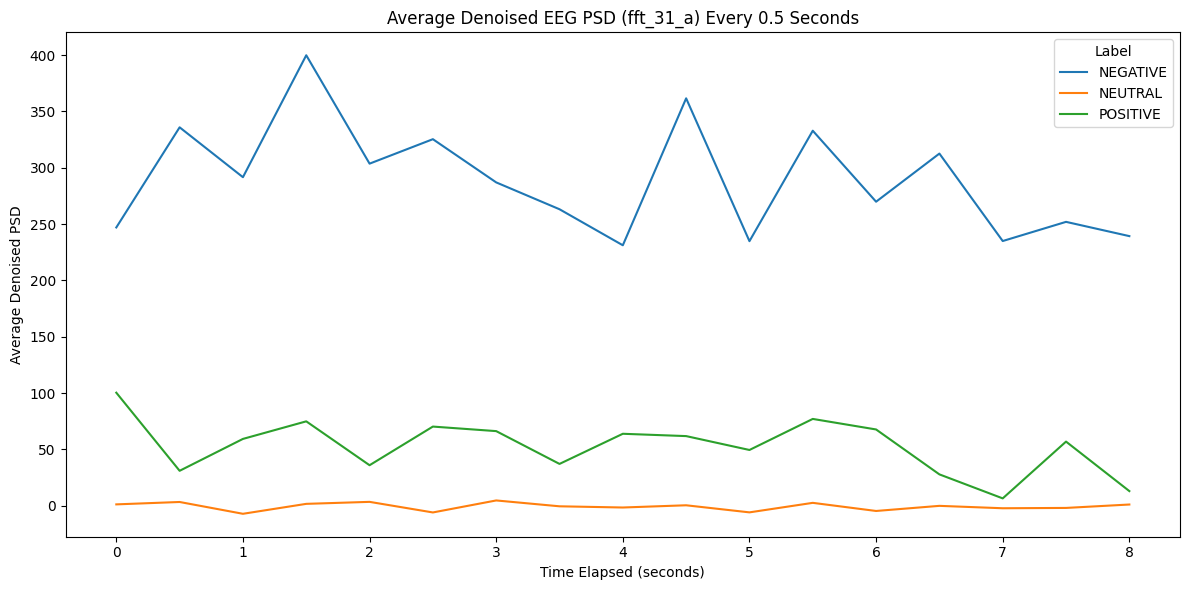

In [26]:
# Create 0.5 second bins
fft_df['time_bin'] = (fft_df['seconds_elapsed'] // 0.5) * 0.5

# Get all fft columns
fft_columns = [col for col in fft_df.columns if 'fft' in col]

# Group by time_bin and label, average all fft columns
avg_df = fft_df.groupby(['time_bin', 'label'], as_index=False)[fft_columns].mean()

# Slice for plotting (first 10 seconds only)
slice_df = avg_df[avg_df['time_bin'] <= 10]

# Plot only fft_31_a
plt.figure(figsize=(12, 6))
sns.lineplot(data=slice_df, x='time_bin', y='fft_31_a', hue='label')
plt.title('Average Denoised EEG PSD (fft_31_a) Every 0.5 Seconds')
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('Average Denoised PSD')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# XGBoost Training - no denoising

In [18]:
# Split data into training and validation sets for early stopping
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)


# ---  XGBoost Model Training with Early Stopping (MODIFIED FOR 3 CLASSES) ---

print("--- Starting XGBoost Training with Early Stopping (3 Classes) ---")

model = xgb.XGBClassifier(
    n_estimators=1000,
    # --- MODIFICATION FOR MULTI-CLASS ---
    objective="multi:softprob", # Use "multi:softprob" for probability output for each class
    eval_metric="mlogloss",     # "mlogloss" (multi-class logloss) for evaluation
    num_class=3,                # Number of unique classes in target
    random_state=42,
    early_stopping_rounds=50,
)

# Fit the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=20
)

print("\n--- XGBoost Training Completed ---")

# --- 4. Access Best Iteration and Score ---
print(f"Best iteration (number of trees): {model.best_iteration}")
print(f"Best validation score: {model.best_score}")

--- Starting XGBoost Training with Early Stopping (3 Classes) ---
[0]	validation_0-mlogloss:0.81028
[20]	validation_0-mlogloss:0.19268
[40]	validation_0-mlogloss:0.18455
[60]	validation_0-mlogloss:0.18653
[80]	validation_0-mlogloss:0.19127
[84]	validation_0-mlogloss:0.19232

--- XGBoost Training Completed ---
Best iteration (number of trees): 34
Best validation score: 0.18271704608722686


In [19]:
# Predict class probabilities
y_val_proba = model.predict_proba(X_val)

# Predict class labels
y_val_pred = model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# Log loss (multi-class logloss, same as eval_metric)
val_logloss = log_loss(y_val, y_val_proba)
print(f"Validation Log Loss: {val_logloss:.4f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Detailed classification report (precision, recall, f1-score)
report = classification_report(y_val, y_val_pred, target_names=le.classes_)
print("\nClassification Report:")
print(report)


Validation Accuracy: 0.9438
Validation Log Loss: 0.1827

Confusion Matrix:
[[139   0   3]
 [  0 142   1]
 [ 19   1 122]]

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.88      0.98      0.93       142
     NEUTRAL       0.99      0.99      0.99       143
    POSITIVE       0.97      0.86      0.91       142

    accuracy                           0.94       427
   macro avg       0.95      0.94      0.94       427
weighted avg       0.95      0.94      0.94       427



# Shap value for feature correlation (top 50 per label) - no denoising

 99%|===================| 6348/6396 [01:01<00:00]        

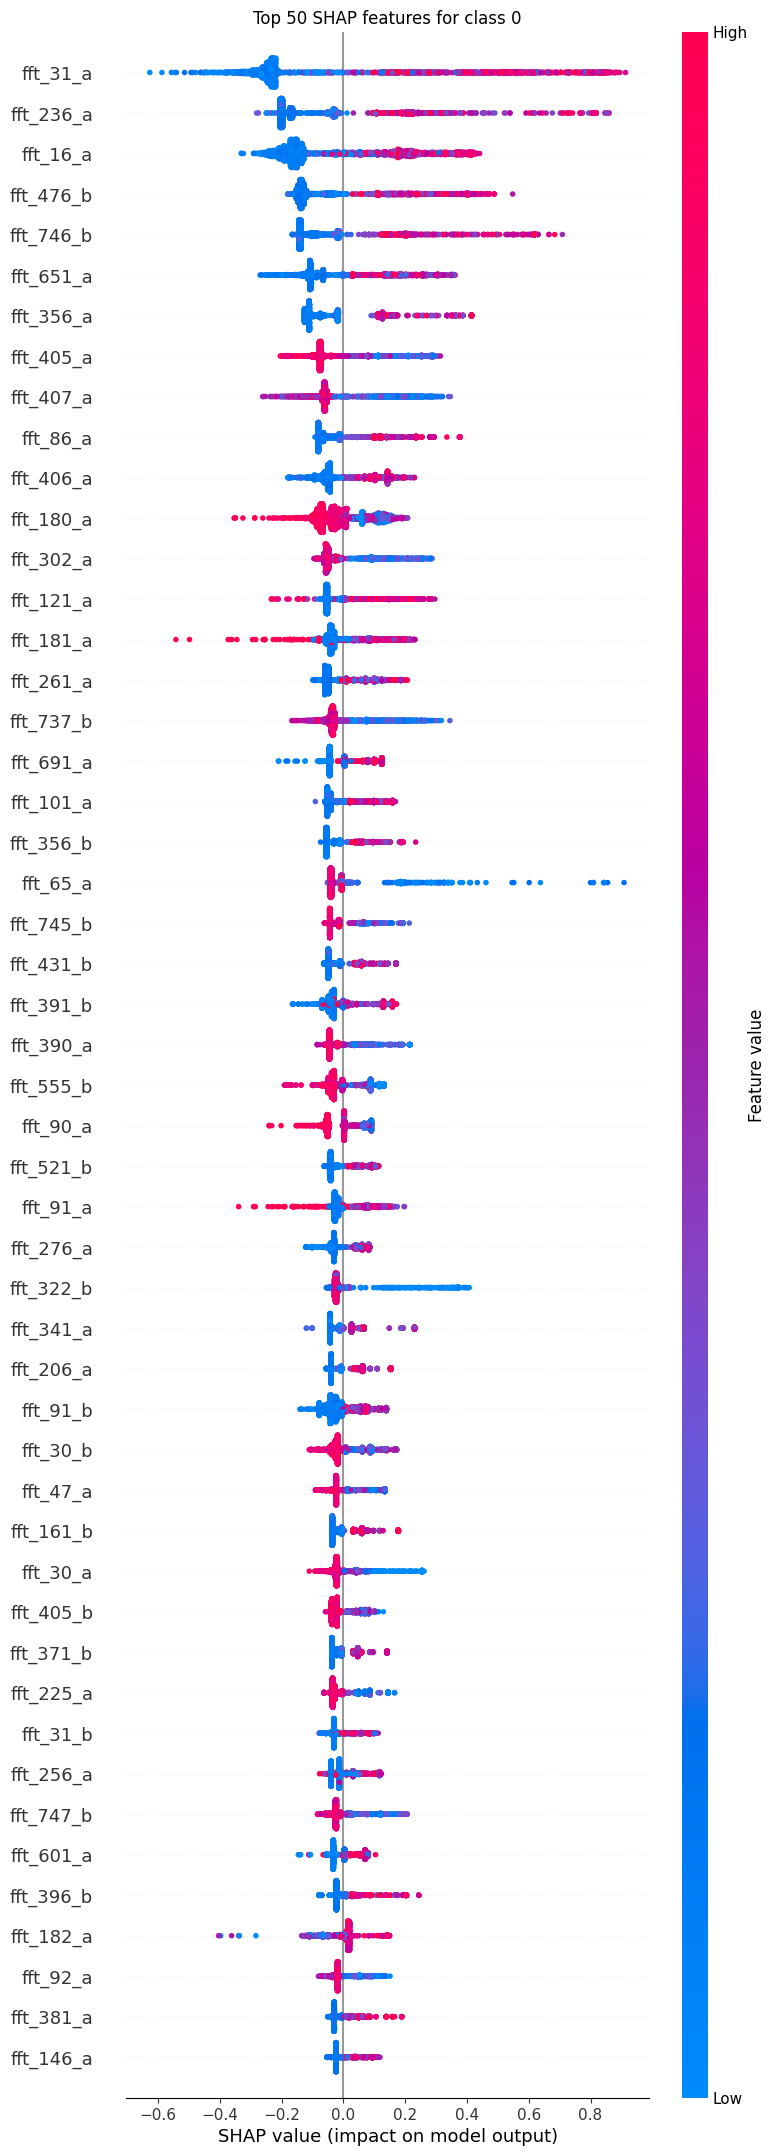

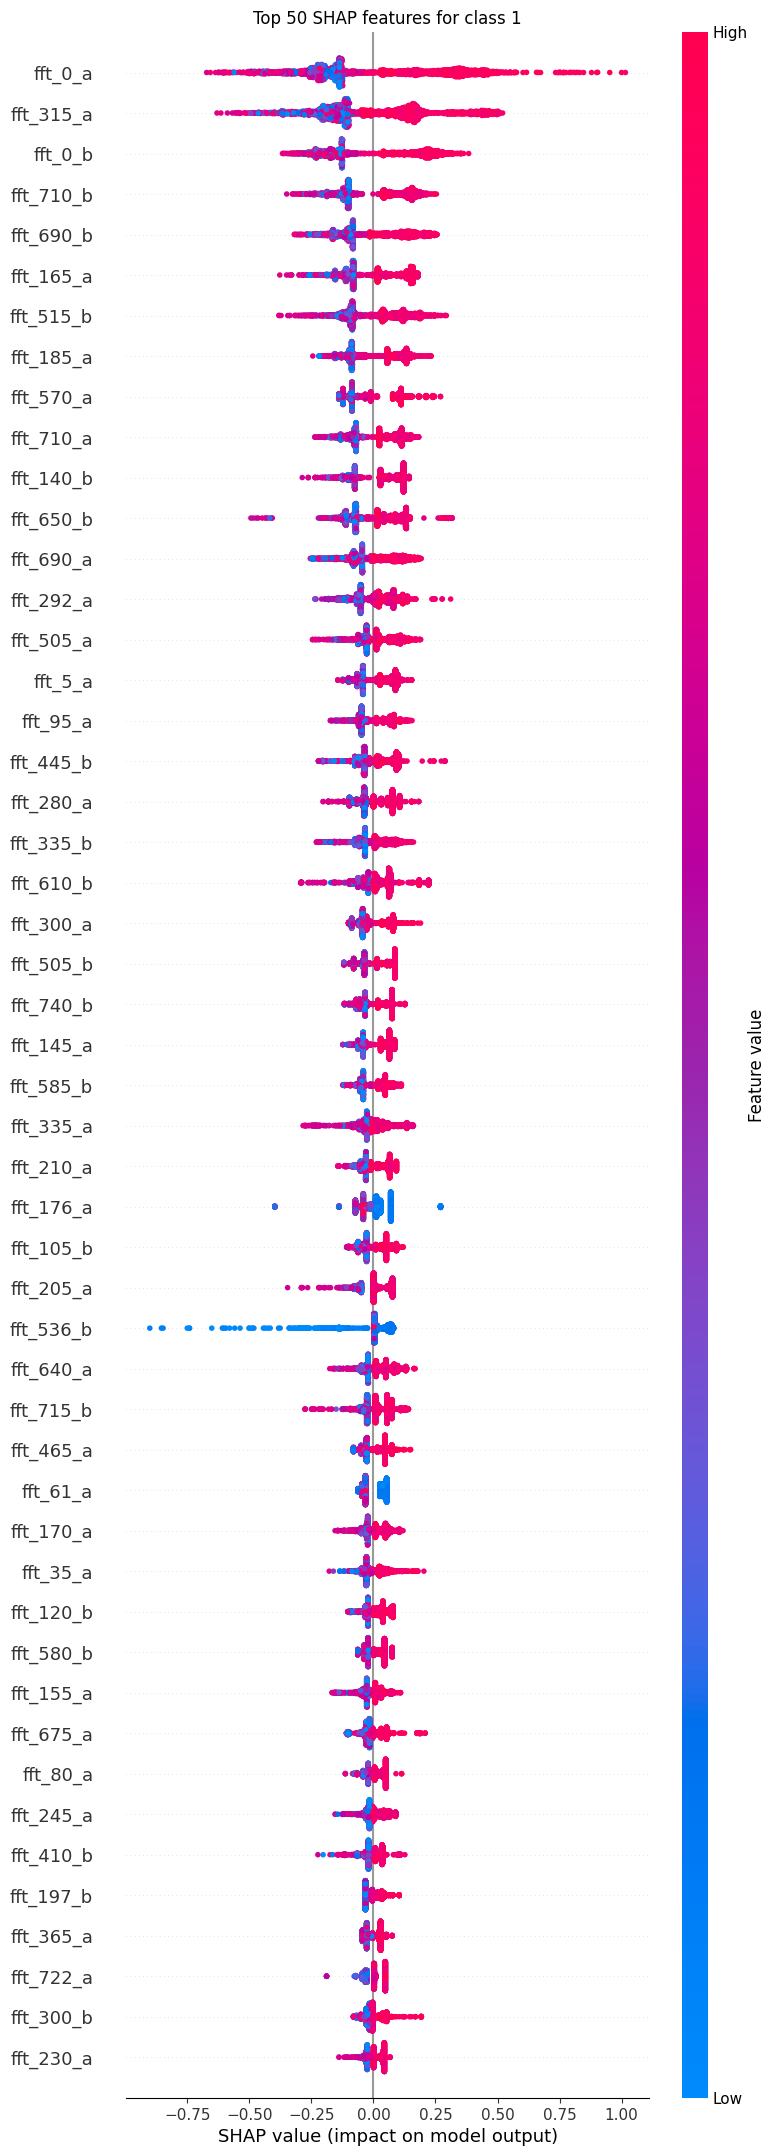

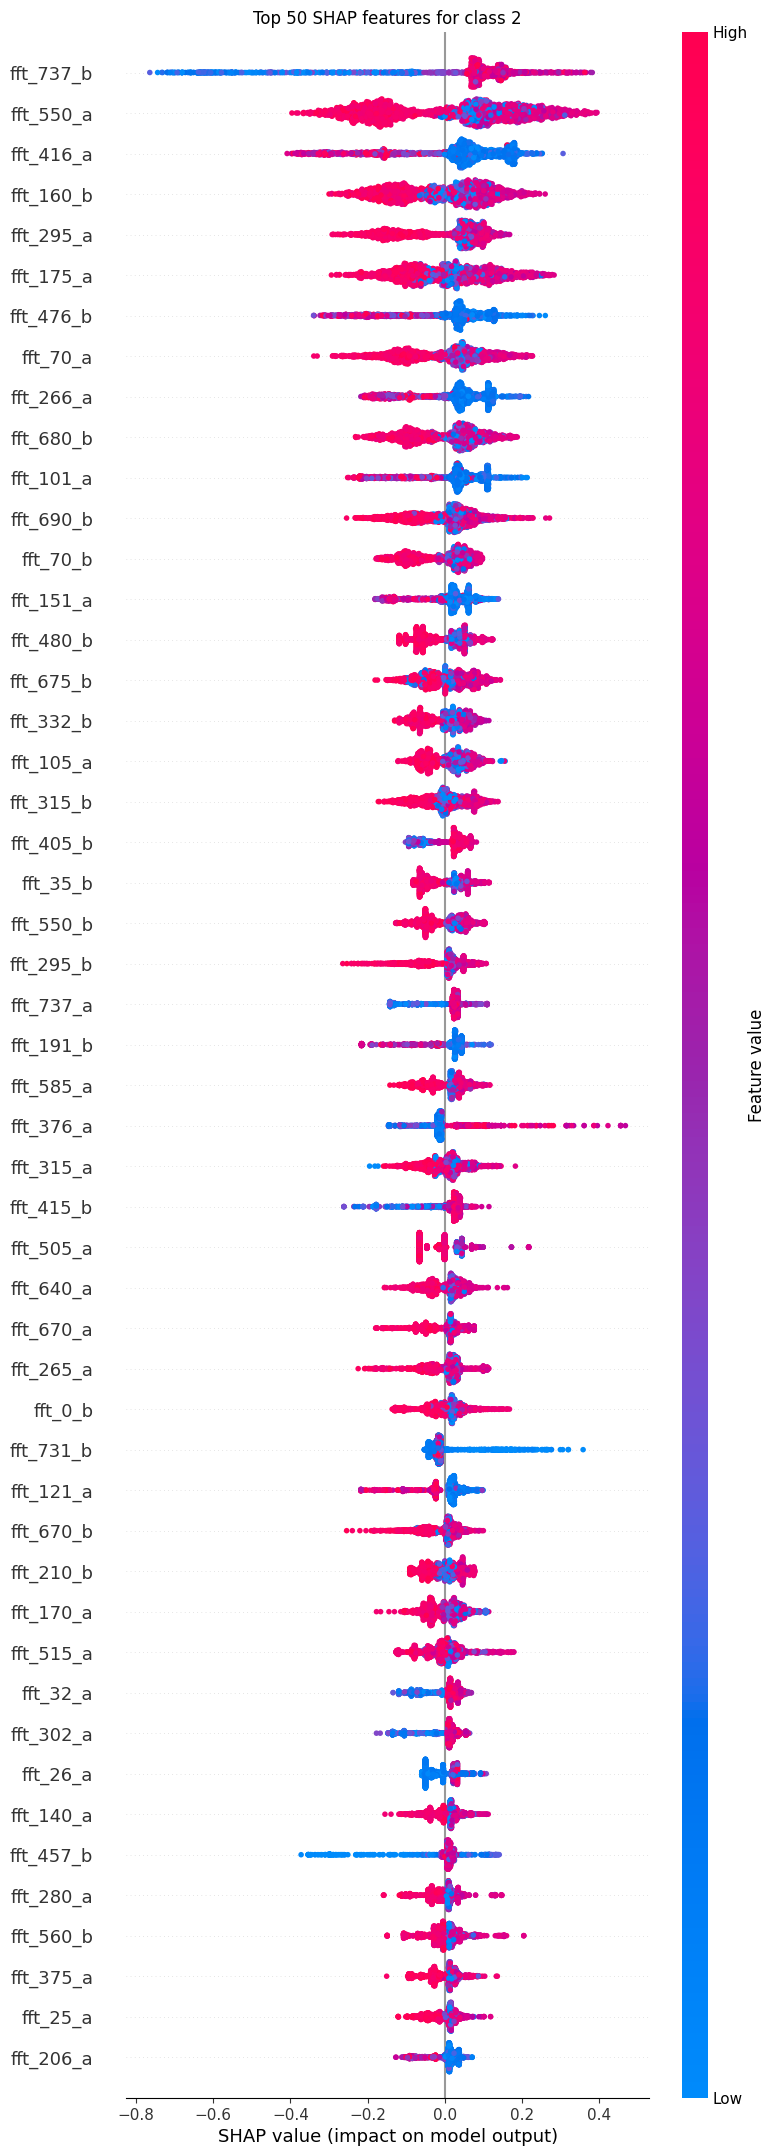

In [20]:
# Explain the model with SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP values for each class
for class_idx in range(3):  # Loop over classes 0,1,2
    class_shap_values = shap_values.values[:, :, class_idx]

    mean_abs_shap = np.abs(class_shap_values).mean(axis=0)
    n_top_features = min(50, class_shap_values.shape[1])
    top_50_idx = np.argsort(mean_abs_shap)[-n_top_features:][::-1]

    X_top50_shap = class_shap_values[:, top_50_idx]
    X_top50_data = X.iloc[:, top_50_idx].values
    top_50_names = np.array(X.columns)[top_50_idx]

    plt.figure(figsize=(10, 6))

    shap.summary_plot(
        X_top50_shap,
        X_top50_data,
        feature_names=top_50_names,
        max_display=50,
        show=False
    )

    plt.title(f"Top 50 SHAP features for class {class_idx}")
    plt.show()

# XGBoost Training and Shap value for feature correlation (top 50) - with denoising

In [21]:
avg_df.head()

,time_bin,label,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,0.0,NEGATIVE,-220.773514,255.018919,-118.877838,-118.877838,255.018919,-241.300000,266.068919,-118.817297,...,-198.856757,242.006486,-111.801892,-111.801892,242.006486,-204.044324,254.540541,-120.762703,-120.762703,254.540541
1,0.0,NEUTRAL,129.065217,-1.604152,3.128217,3.128217,-1.604152,134.430435,-5.280291,3.053065,...,132.386957,2.446435,0.588435,0.588435,2.446435,134.439130,1.775341,4.310717,4.310717,1.775341
2,0.0,POSITIVE,-48.044844,93.996044,-68.348889,-68.348889,93.996044,-46.702222,100.139689,-56.353333,...,-26.851556,92.108222,-58.281333,-58.281333,92.108222,-1.732422,66.452000,-49.405333,-49.405333,66.452000
3,0.5,NEGATIVE,-309.142857,311.491224,-148.865306,-148.865306,311.491224,-126.959184,199.660429,-95.099796,...,-140.916939,207.869388,-96.866122,-96.866122,207.869388,-134.140816,187.900000,-85.227551,-85.227551,187.900000
4,0.5,NEUTRAL,142.267500,3.247407,2.647425,2.647425,3.247407,145.635000,2.237940,0.371425,...,154.717500,1.408750,-1.792200,-1.792200,1.408750,138.317500,-3.719150,8.205000,8.205000,-3.719150


In [22]:
# Variables
X = avg_df.drop(['label', 'time_bin'], axis=1) # axis 1 = across columns
y = avg_df['label']
# Encode y values to numeric**************************************
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [23]:
# Split data into training and validation sets for early stopping
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)


# ---  XGBoost Model Training with Early Stopping (MODIFIED FOR 3 CLASSES) ---

print("--- Starting XGBoost Training with Early Stopping (3 Classes) ---")

model = xgb.XGBClassifier(
    n_estimators=1000,
    # --- MODIFICATION FOR MULTI-CLASS ---
    objective="multi:softprob", # Use "multi:softprob" for probability output for each class
    eval_metric="mlogloss",     # "mlogloss" (multi-class logloss) for evaluation
    num_class=3,                # Number of unique classes in target
    random_state=42,
    early_stopping_rounds=50,
)

# Fit the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=20
)

print("\n--- XGBoost Training Completed ---")

# --- 4. Access Best Iteration and Score ---
print(f"Best iteration (number of trees): {model.best_iteration}")
print(f"Best validation score: {model.best_score}")

--- Starting XGBoost Training with Early Stopping (3 Classes) ---
[0]	validation_0-mlogloss:0.74742
[20]	validation_0-mlogloss:0.03916
[40]	validation_0-mlogloss:0.03863
[60]	validation_0-mlogloss:0.03841
[80]	validation_0-mlogloss:0.03823
[100]	validation_0-mlogloss:0.03830
[120]	validation_0-mlogloss:0.03813
[140]	validation_0-mlogloss:0.03800
[160]	validation_0-mlogloss:0.03793
[180]	validation_0-mlogloss:0.03795
[200]	validation_0-mlogloss:0.03783
[220]	validation_0-mlogloss:0.03775
[240]	validation_0-mlogloss:0.03769
[260]	validation_0-mlogloss:0.03761
[280]	validation_0-mlogloss:0.03756
[300]	validation_0-mlogloss:0.03754
[320]	validation_0-mlogloss:0.03757
[340]	validation_0-mlogloss:0.03757
[360]	validation_0-mlogloss:0.03756
[380]	validation_0-mlogloss:0.03750
[400]	validation_0-mlogloss:0.03740
[420]	validation_0-mlogloss:0.03731
[440]	validation_0-mlogloss:0.03734
[460]	validation_0-mlogloss:0.03736
[475]	validation_0-mlogloss:0.03735

--- XGBoost Training Completed ---
Best

In [24]:
# Predict class probabilities
y_val_proba = model.predict_proba(X_val)

# Predict class labels
y_val_pred = model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {accuracy:.4f}")

# Log loss (multi-class logloss, same as eval_metric)
val_logloss = log_loss(y_val, y_val_proba)
print(f"Validation Log Loss: {val_logloss:.4f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Detailed classification report (precision, recall, f1-score)
report = classification_report(y_val, y_val_pred, target_names=le.classes_)
print("\nClassification Report:")
print(report)


Validation Accuracy: 1.0000
Validation Log Loss: 0.0373

Confusion Matrix:
[[3 0 0]
 [0 4 0]
 [0 0 4]]

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00         3
     NEUTRAL       1.00      1.00      1.00         4
    POSITIVE       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



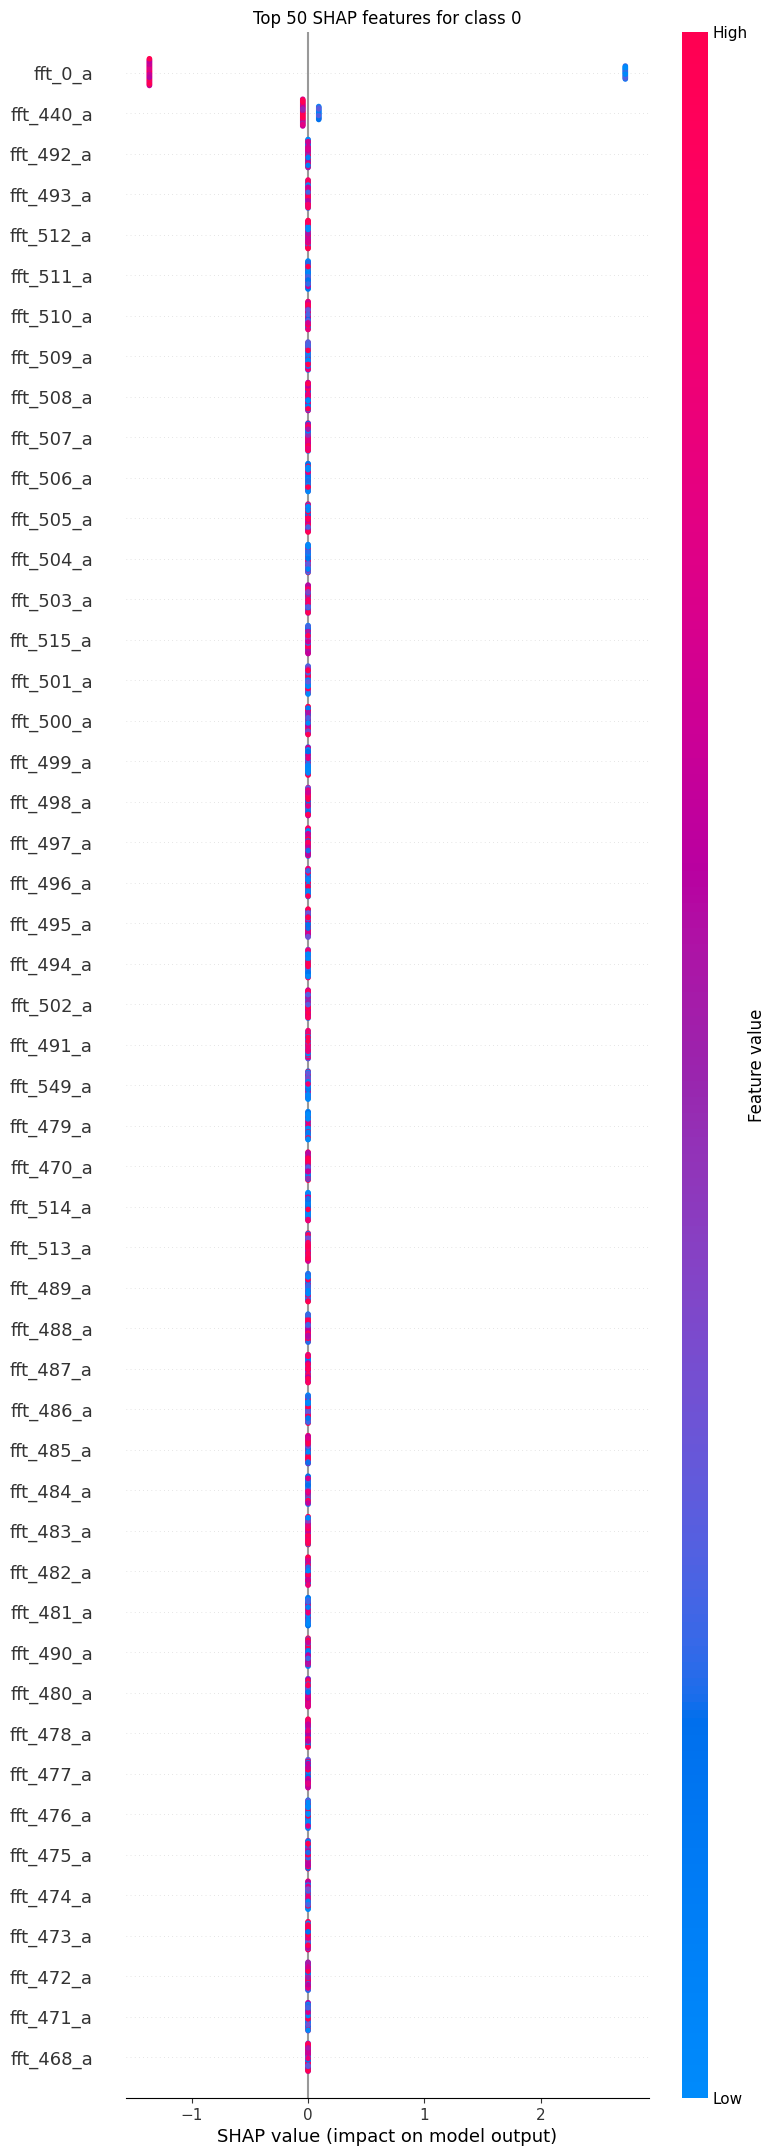

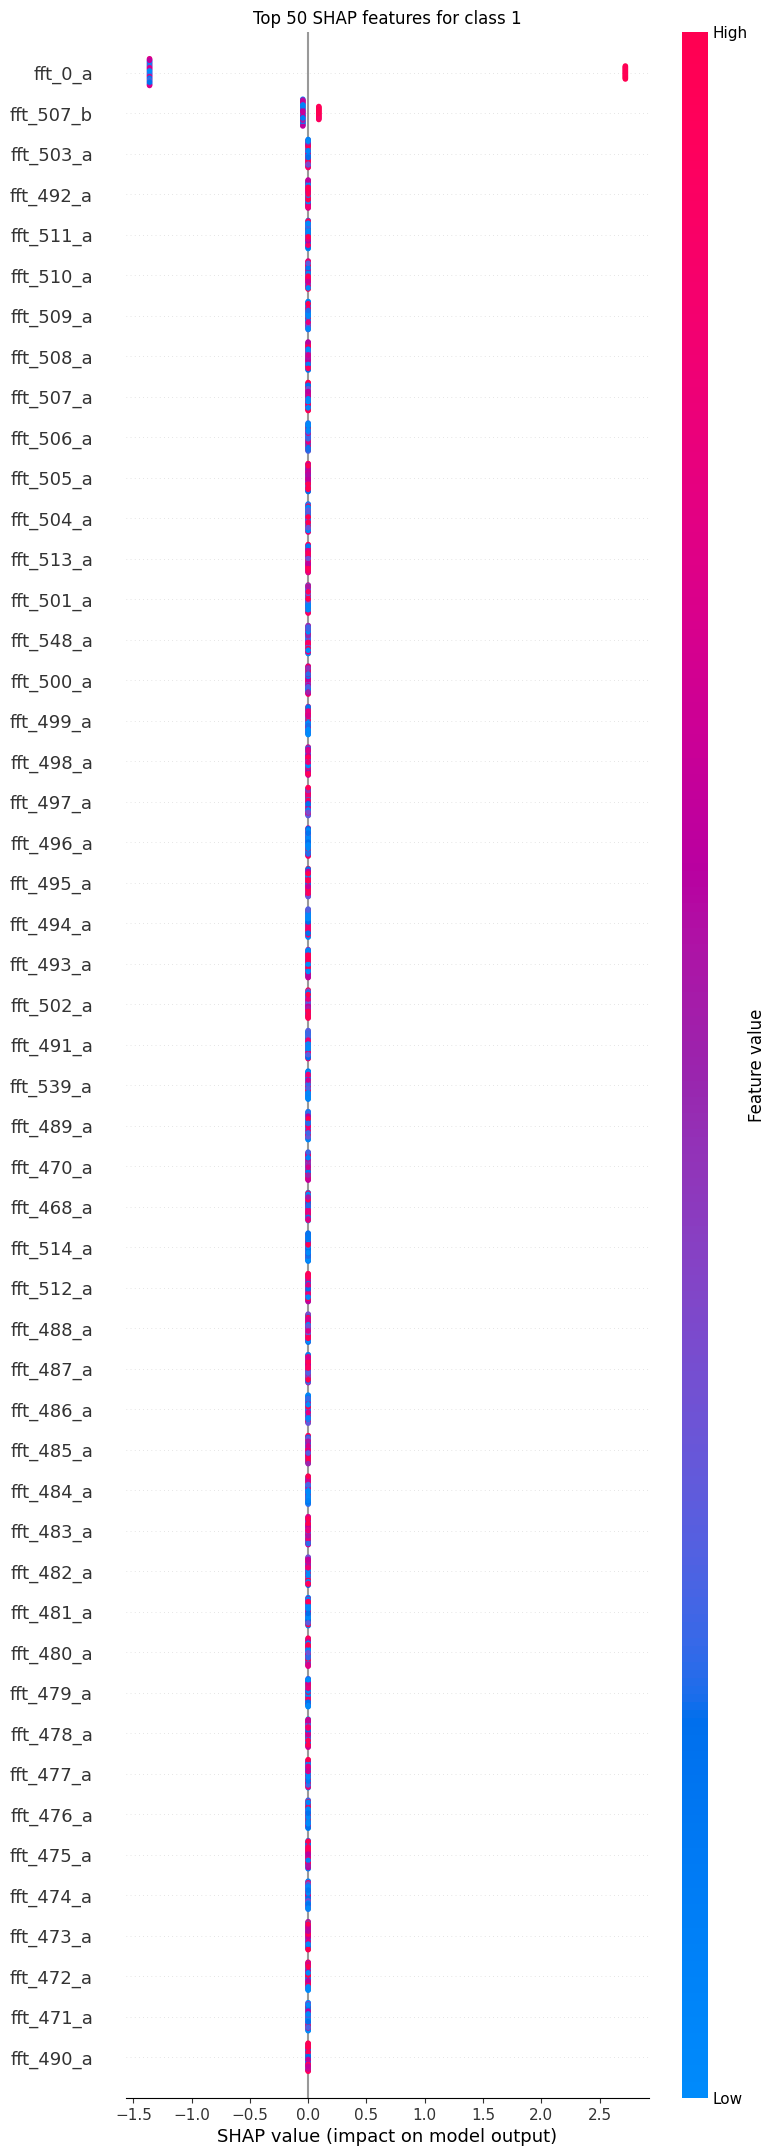

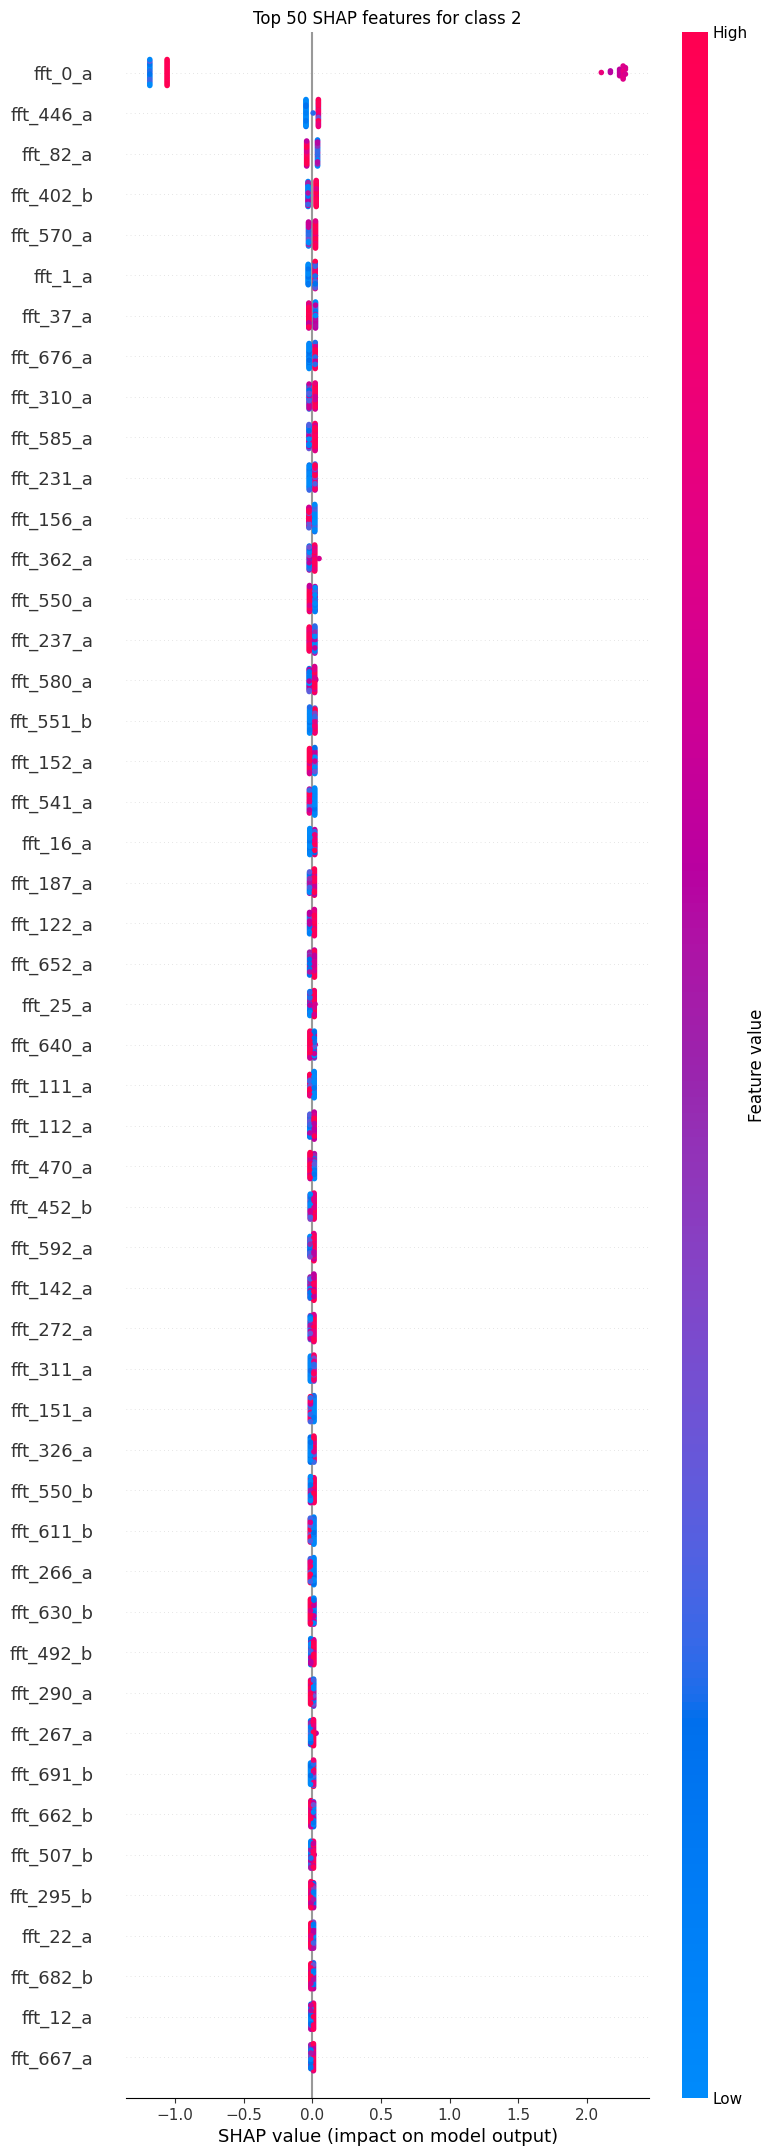

In [25]:
# Explain the model with SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP values for each class
for class_idx in range(3):  # Loop over classes 0,1,2
    class_shap_values = shap_values.values[:, :, class_idx]

    mean_abs_shap = np.abs(class_shap_values).mean(axis=0)
    n_top_features = min(50, class_shap_values.shape[1])
    top_50_idx = np.argsort(mean_abs_shap)[-n_top_features:][::-1]

    X_top50_shap = class_shap_values[:, top_50_idx]
    X_top50_data = X.iloc[:, top_50_idx].values
    top_50_names = np.array(X.columns)[top_50_idx]

    plt.figure(figsize=(10, 6))

    shap.summary_plot(
        X_top50_shap,
        X_top50_data,
        feature_names=top_50_names,
        max_display=50,
        show=False
    )

    plt.title(f"Top 50 SHAP features for class {class_idx}")
    plt.show()